# <a id='introduction'></a>
<h1 style='background:#5ced73;border-radius: 10px; color:black;height:35px'>
<center>Particle Physics Event Classification</center>
</h1>

## Problem Statement:
In the field of particle physics, accurate identification and classification of events are crucial for understanding fundamental particles and their interactions. The goal of this project is to build a machine learning model that can classify events as either **signal (s)** or **background (b)**. This classification will help distinguish between events of interest (signal) and background noise, contributing to the advancement of research in particle physics.

## Objective:
The primary objective is to develop a machine learning model that accurately classifies events based on the provided features derived from particle physics experiments. Correct classification of these events will aid researchers in identifying potentially significant phenomena amidst a large volume of experimental data.

## Data Description:
The dataset consists of 250,001 rows and 33 columns. Each row represents an event, and the columns contain features derived from particle physics experiments, such as:

- **EventId**: Identifier for each event
- **DER_mass_MMC**: Derived mass from the Missing Mass Calculator
- **DER_mass_transverse_met_lep**: Mass calculated from transverse components of missing energy and lepton
- **DER_mass_vis**: Derived mass of the visible part of the system
- **DER_pt_h**: Transverse momentum of the Higgs boson
- **DER_deltaeta_jet_jet**: Difference in pseudorapidity between two jets
- **PRI_tau_pt**: Transverse momentum of the tau particle
- **PRI_met**: Missing transverse energy
- **PRI_jet_num**: Number of jets in the event
- **Weight**: A weight associated with each event, used as a scaling factor
- **Label**: The target variable, where 's' indicates a signal event and 'b' indicates a background event

### <a id='top'></a>
<h1 style='background:#90EE90; border-radius: 10px; color:black'><center><h2>TABLE OF CONTENTS</center></h1>

### [**Step 1: Import Libraries**](#step1)

### [**Step 2: Load and Explore Data**](#step2)

### [**Step 3: Data Preprocessing**](#step3)

### [**Step 4: Exploratory Data Analysis (EDA)**](#step4)
    
### [**Step 5: Model Training and Evaluation**](#step5)
    
### [**Step 6: Feature Importance**](#step6)
    
### [**Step 7: Conclusion and Recommendations**](#step7)

    
[Back to Table of Contents](#top)
</div>

## <a id='step1'></a>
## Step 1: Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os

In [2]:
os.chdir("F:\\Data_Science_LB\\Project\\Data Sets")    #added path to my local system to access dataset

## <a id='step2'></a>
## Step 2: Load and Explore Data

In [3]:
data = pd.read_csv('Data.csv')

# Display the first few rows to understand the structure
data.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,9.00,-999.000,-999.000,3.310,0.414,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b


[Back to Table of Contents](#top)
</div>

### <a id='step3'></a>
## Step 3: Data Preprocessing

In [4]:
# Check for missing values or anomalies in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   EventId                      250000 non-null  int64  
 1   DER_mass_MMC                 250000 non-null  float64
 2   DER_mass_transverse_met_lep  250000 non-null  float64
 3   DER_mass_vis                 250000 non-null  float64
 4   DER_pt_h                     250000 non-null  float64
 5   DER_deltaeta_jet_jet         250000 non-null  float64
 6   DER_mass_jet_jet             250000 non-null  float64
 7   DER_prodeta_jet_jet          250000 non-null  float64
 8   DER_deltar_tau_lep           250000 non-null  float64
 9   DER_pt_tot                   250000 non-null  float64
 10  DER_sum_pt                   250000 non-null  float64
 11  DER_pt_ratio_lep_tau         250000 non-null  float64
 12  DER_met_phi_centrality       250000 non-null  float64
 13 

In [5]:
# Checking for null values
data.isnull().sum()

EventId                        0
DER_mass_MMC                   0
DER_mass_transverse_met_lep    0
DER_mass_vis                   0
DER_pt_h                       0
DER_deltaeta_jet_jet           0
DER_mass_jet_jet               0
DER_prodeta_jet_jet            0
DER_deltar_tau_lep             0
DER_pt_tot                     0
DER_sum_pt                     0
DER_pt_ratio_lep_tau           0
DER_met_phi_centrality         0
DER_lep_eta_centrality         0
PRI_tau_pt                     0
PRI_tau_eta                    0
PRI_tau_phi                    0
PRI_lep_pt                     0
PRI_lep_eta                    0
PRI_lep_phi                    0
PRI_met                        0
PRI_met_phi                    0
PRI_met_sumet                  0
PRI_jet_num                    0
PRI_jet_leading_pt             0
PRI_jet_leading_eta            0
PRI_jet_leading_phi            0
PRI_jet_subleading_pt          0
PRI_jet_subleading_eta         0
PRI_jet_subleading_phi         0
PRI_jet_al

In [6]:
# Check which features contain -999 values (if -999 is a placeholder for missing values)
invalid_values = (data == -999).sum()
print("Features with -999 values:\n", invalid_values)

Features with -999 values:
 EventId                             0
DER_mass_MMC                    38114
DER_mass_transverse_met_lep         0
DER_mass_vis                        0
DER_pt_h                            0
DER_deltaeta_jet_jet           177456
DER_mass_jet_jet               177457
DER_prodeta_jet_jet            177457
DER_deltar_tau_lep                  0
DER_pt_tot                          0
DER_sum_pt                          0
DER_pt_ratio_lep_tau                0
DER_met_phi_centrality              0
DER_lep_eta_centrality         177457
PRI_tau_pt                          0
PRI_tau_eta                         0
PRI_tau_phi                         0
PRI_lep_pt                          0
PRI_lep_eta                         0
PRI_lep_phi                         0
PRI_met                             0
PRI_met_phi                         0
PRI_met_sumet                       0
PRI_jet_num                         0
PRI_jet_leading_pt              99913
PRI_jet_leading_eta   

C:\Users\Dell\AppData\Local\Temp\ipykernel_3256\2455413969.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_data.values, y=missing_data.index, palette='coolwarm')


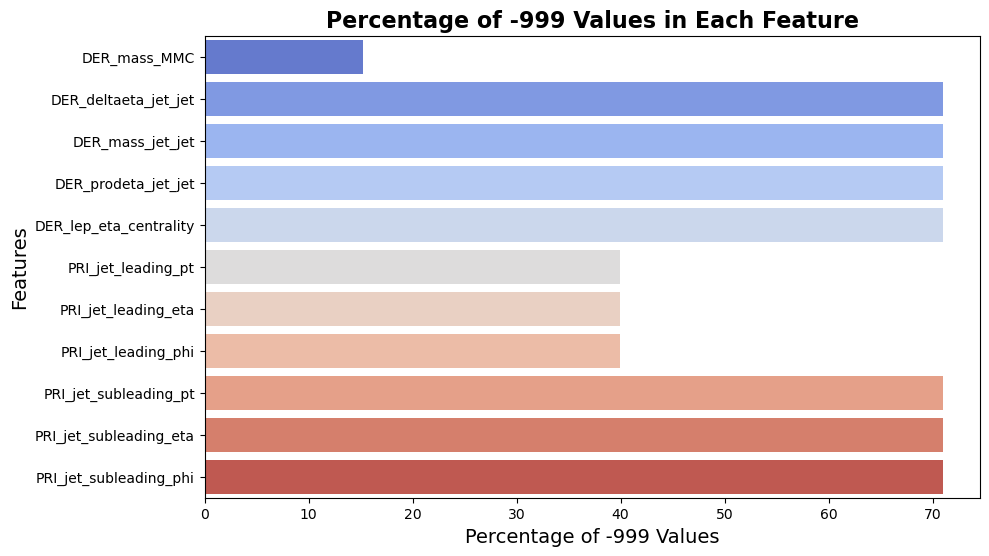

In [7]:
# Calculate the percentage of -999 values for each feature
missing_data = (data == -999).sum() / len(data) * 100
missing_data = missing_data[missing_data > 0]  # Only keep features with -999 values

# Plot the missing data
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_data.values, y=missing_data.index, palette='coolwarm')
plt.title('Percentage of -999 Values in Each Feature', fontsize=16, weight='bold')
plt.xlabel('Percentage of -999 Values', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.show()

In [8]:
# Replace -999 with NaN for further cleaning
data.replace(-999, np.nan, inplace=True)

In [9]:
# Check which features contain -999 values
(data == -999).sum()

EventId                        0
DER_mass_MMC                   0
DER_mass_transverse_met_lep    0
DER_mass_vis                   0
DER_pt_h                       0
DER_deltaeta_jet_jet           0
DER_mass_jet_jet               0
DER_prodeta_jet_jet            0
DER_deltar_tau_lep             0
DER_pt_tot                     0
DER_sum_pt                     0
DER_pt_ratio_lep_tau           0
DER_met_phi_centrality         0
DER_lep_eta_centrality         0
PRI_tau_pt                     0
PRI_tau_eta                    0
PRI_tau_phi                    0
PRI_lep_pt                     0
PRI_lep_eta                    0
PRI_lep_phi                    0
PRI_met                        0
PRI_met_phi                    0
PRI_met_sumet                  0
PRI_jet_num                    0
PRI_jet_leading_pt             0
PRI_jet_leading_eta            0
PRI_jet_leading_phi            0
PRI_jet_subleading_pt          0
PRI_jet_subleading_eta         0
PRI_jet_subleading_phi         0
PRI_jet_al

In [10]:
# Check again for missing values
data.isnull().sum()

EventId                             0
DER_mass_MMC                    38114
DER_mass_transverse_met_lep         0
DER_mass_vis                        0
DER_pt_h                            0
DER_deltaeta_jet_jet           177456
DER_mass_jet_jet               177457
DER_prodeta_jet_jet            177457
DER_deltar_tau_lep                  0
DER_pt_tot                          0
DER_sum_pt                          0
DER_pt_ratio_lep_tau                0
DER_met_phi_centrality              0
DER_lep_eta_centrality         177457
PRI_tau_pt                          0
PRI_tau_eta                         0
PRI_tau_phi                         0
PRI_lep_pt                          0
PRI_lep_eta                         0
PRI_lep_phi                         0
PRI_met                             0
PRI_met_phi                         0
PRI_met_sumet                       0
PRI_jet_num                         0
PRI_jet_leading_pt              99913
PRI_jet_leading_eta             99913
PRI_jet_lead

In [11]:
# Check the percentage of missing values in each column
missing_percentage = data.isnull().mean() * 100
print("Percentage of missing values in each column (descending order):")
missing_percentage.sort_values(ascending=False)

Percentage of missing values in each column (descending order):


PRI_jet_subleading_pt          70.9828
PRI_jet_subleading_phi         70.9828
DER_mass_jet_jet               70.9828
DER_prodeta_jet_jet            70.9828
PRI_jet_subleading_eta         70.9828
DER_lep_eta_centrality         70.9828
DER_deltaeta_jet_jet           70.9824
PRI_jet_leading_phi            39.9652
PRI_jet_leading_eta            39.9652
PRI_jet_leading_pt             39.9652
DER_mass_MMC                   15.2456
PRI_jet_num                     0.0000
PRI_met_phi                     0.0000
PRI_met_sumet                   0.0000
EventId                         0.0000
PRI_lep_phi                     0.0000
PRI_jet_all_pt                  0.0000
Weight                          0.0000
PRI_met                         0.0000
PRI_tau_phi                     0.0000
PRI_lep_eta                     0.0000
PRI_lep_pt                      0.0000
PRI_tau_eta                     0.0000
PRI_tau_pt                      0.0000
DER_met_phi_centrality          0.0000
DER_pt_ratio_lep_tau     

In [12]:
# Drop columns with more than 50% missing values and print dropped columns
initial_columns = data.columns
data = data.dropna(thresh=data.shape[0] * 0.5, axis=1)
dropped_columns = set(initial_columns) - set(data.columns)
print(f"Columns dropped due to missing values: {dropped_columns}")

Columns dropped due to missing values: {'DER_prodeta_jet_jet', 'DER_deltaeta_jet_jet', 'PRI_jet_subleading_eta', 'DER_mass_jet_jet', 'DER_lep_eta_centrality', 'PRI_jet_subleading_phi', 'PRI_jet_subleading_pt'}


In [13]:
# Separate numeric columns
numeric_columns = data.select_dtypes(include=[np.number]).columns
print("Numeric columns in the dataset:\n", numeric_columns)

Numeric columns in the dataset:
 Index(['EventId', 'DER_mass_MMC', 'DER_mass_transverse_met_lep',
       'DER_mass_vis', 'DER_pt_h', 'DER_deltar_tau_lep', 'DER_pt_tot',
       'DER_sum_pt', 'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality',
       'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi', 'PRI_lep_pt', 'PRI_lep_eta',
       'PRI_lep_phi', 'PRI_met', 'PRI_met_phi', 'PRI_met_sumet', 'PRI_jet_num',
       'PRI_jet_leading_pt', 'PRI_jet_leading_eta', 'PRI_jet_leading_phi',
       'PRI_jet_all_pt', 'Weight'],
      dtype='object')


In [14]:
# Impute missing values for only numeric columns using the median
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].median())

# Display the updated numeric columns after imputation
print("Numeric columns after imputation:\n")
data[numeric_columns].head()

Numeric columns after imputation:



,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,...,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_all_pt,Weight
0,100000,138.470,51.655,97.827,27.980,3.064,41.928,197.760,1.582,1.396,...,-2.414,16.824,-0.277,258.733,2,67.435,2.150,0.444,113.497,0.002653
1,100001,160.937,68.768,103.235,48.146,3.473,2.078,125.157,0.879,1.414,...,0.103,44.704,-1.916,164.546,1,46.226,0.725,1.158,46.226,2.233584
2,100002,112.406,162.172,125.953,35.635,3.148,9.336,197.814,3.776,1.414,...,1.052,54.283,-2.186,260.414,1,44.251,2.053,-2.028,44.251,2.347389
3,100003,143.905,81.417,80.943,0.414,3.310,0.414,75.968,2.354,-1.285,...,-3.100,31.082,0.060,86.062,0,65.561,0.000,-0.033,0.000,5.446378
4,100004,175.864,16.915,134.805,16.405,3.891,16.405,57.983,1.056,-1.385,...,1.569,2.723,-0.871,53.131,0,65.561,0.000,-0.033,0.000,6.245333


In [15]:
# Check again for missing values
data.isnull().sum()

EventId                        0
DER_mass_MMC                   0
DER_mass_transverse_met_lep    0
DER_mass_vis                   0
DER_pt_h                       0
DER_deltar_tau_lep             0
DER_pt_tot                     0
DER_sum_pt                     0
DER_pt_ratio_lep_tau           0
DER_met_phi_centrality         0
PRI_tau_pt                     0
PRI_tau_eta                    0
PRI_tau_phi                    0
PRI_lep_pt                     0
PRI_lep_eta                    0
PRI_lep_phi                    0
PRI_met                        0
PRI_met_phi                    0
PRI_met_sumet                  0
PRI_jet_num                    0
PRI_jet_leading_pt             0
PRI_jet_leading_eta            0
PRI_jet_leading_phi            0
PRI_jet_all_pt                 0
Weight                         0
Label                          0
dtype: int64

In [16]:
# Identify non-numeric columns
non_numeric_columns = data.select_dtypes(exclude=[np.number]).columns
print("Non-numeric columns in the dataset:\n")
non_numeric_columns

Non-numeric columns in the dataset:



Index(['Label'], dtype='object')

In [17]:
# Label encode 'Label' column
data['Label_encoded'] = data['Label'].apply(lambda x: 1 if x == 's' else 0)

# Drop the original 'Label' column
data = data.drop(columns=['Label'])

In [18]:
# Check the columns in the dataset
print(data.columns)

Index(['EventId', 'DER_mass_MMC', 'DER_mass_transverse_met_lep',
       'DER_mass_vis', 'DER_pt_h', 'DER_deltar_tau_lep', 'DER_pt_tot',
       'DER_sum_pt', 'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality',
       'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi', 'PRI_lep_pt', 'PRI_lep_eta',
       'PRI_lep_phi', 'PRI_met', 'PRI_met_phi', 'PRI_met_sumet', 'PRI_jet_num',
       'PRI_jet_leading_pt', 'PRI_jet_leading_eta', 'PRI_jet_leading_phi',
       'PRI_jet_all_pt', 'Weight', 'Label_encoded'],
      dtype='object')


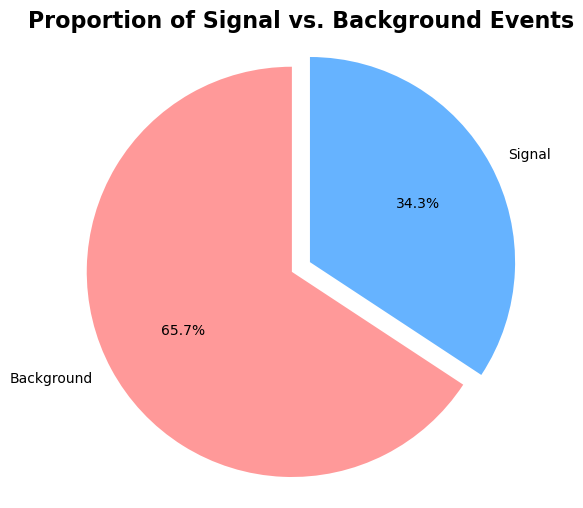

In [63]:
# 'Label_encoded' contains the encoded labels where 0 = Background and 1 = Signal
label_counts = data['Label_encoded'].value_counts()

# Pie chart data
labels = ['Background', 'Signal']
sizes = [label_counts[0], label_counts[1]]
colors = ['#ff9999','#66b3ff']

# Create the pie chart
plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, explode=(0, 0.1))
plt.title('Proportion of Signal vs. Background Events', fontsize=16, weight='bold')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

[Back to Table of Contents](#top)
</div>

## <a id='step4'></a>
## Step 4: Exploratory Data Analysis (EDA)

In [19]:
# Get a summary of statistics for numerical features
data.describe()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,...,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_all_pt,Weight,Label_encoded
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,...,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,224999.500000,120.417434,49.239819,81.181982,57.895962,2.373100,18.917332,158.432217,1.437609,-0.128305,...,41.717235,-0.010119,209.797178,0.979176,77.124366,-0.001966,-0.020629,73.064591,1.646767,0.342668
std,72168.927986,52.859218,35.344886,40.828691,63.655682,0.782911,22.273494,115.706115,0.844743,1.193585,...,32.894693,1.812223,126.499506,0.977426,47.939899,1.382703,1.405084,98.015662,1.875103,0.474603
min,100000.000000,9.044000,0.000000,6.329000,0.000000,0.208000,0.000000,46.104000,0.047000,-1.414000,...,0.109000,-3.142000,13.678000,0.000000,30.000000,-4.499000,-3.142000,0.000000,0.001502,0.000000
25%,162499.750000,95.665000,19.241000,59.388750,14.068750,1.810000,2.841000,77.550000,0.883000,-1.371000,...,21.398000,-1.575000,123.017500,0.000000,57.439000,-0.433000,-0.556000,0.000000,0.018636,0.000000
50%,224999.500000,112.406000,46.524000,73.752000,38.467500,2.491500,12.315500,120.664500,1.280000,-0.356000,...,34.802000,-0.024000,179.739000,1.000000,65.561000,0.000000,-0.033000,40.512500,1.156188,0.000000
75%,287499.250000,130.606250,73.598000,92.259000,79.169000,2.961000,27.591000,200.478250,1.777000,1.225000,...,51.895000,1.561000,263.379250,2.000000,75.349000,0.433000,0.503000,109.933750,2.404128,1.000000
max,349999.000000,1192.026000,690.075000,1349.351000,2834.999000,5.684000,2834.999000,1852.462000,19.773000,1.414000,...,2842.617000,3.142000,2003.976000,3.000000,1120.573000,4.499000,3.141000,1633.433000,7.822543,1.000000


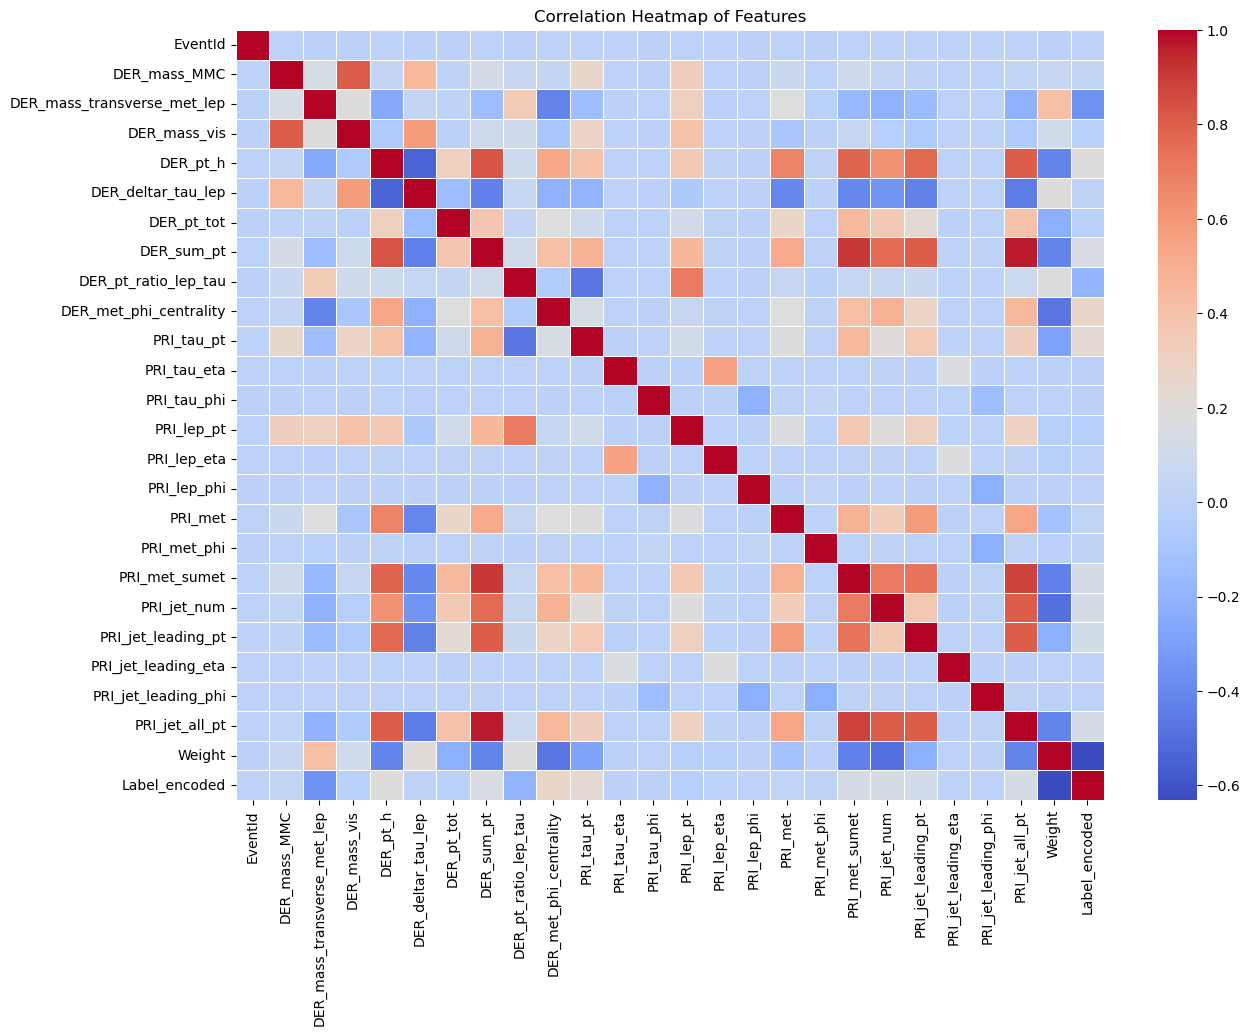

In [20]:
# Drop non-numeric columns before computing the correlation matrix
numeric_data = data.select_dtypes(include=[np.number])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()

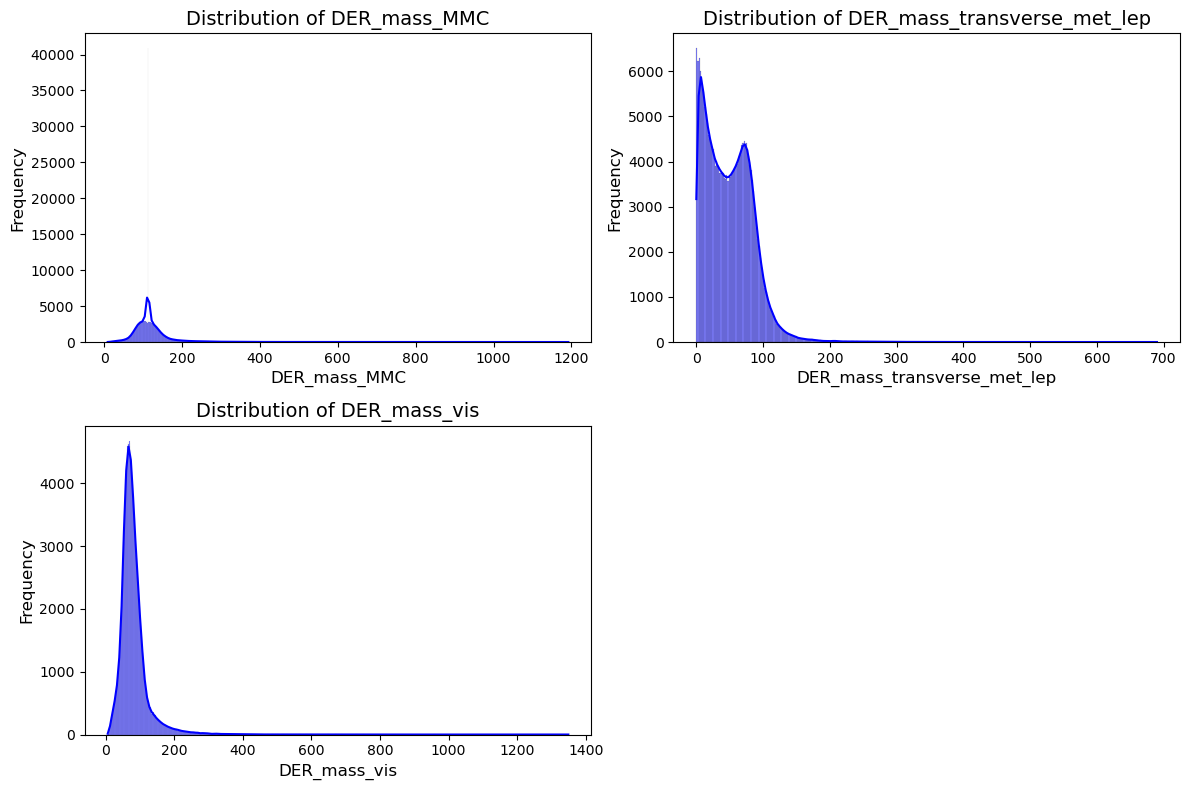

In [22]:
# Plot the distribution of key features
important_features = ['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis']

plt.figure(figsize=(12, 8))
for i, feature in enumerate(important_features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data[feature], kde=True, color='b')
    plt.title(f'Distribution of {feature}', fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)

plt.tight_layout()
plt.show()

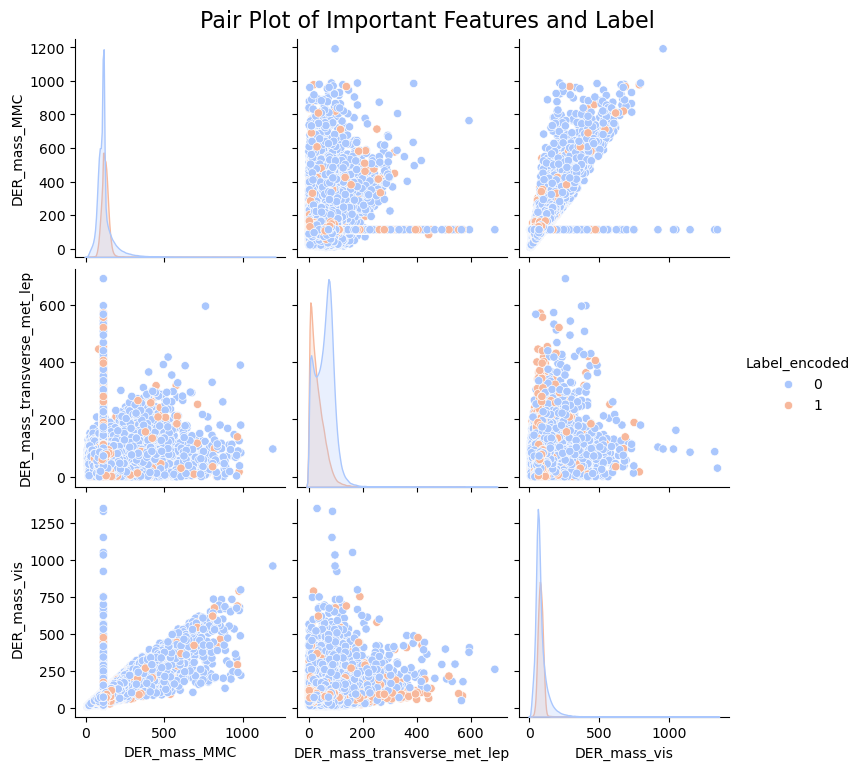

In [23]:
# Pair plot to visualize relationships between important features and the target
sns.pairplot(data, vars=important_features, hue='Label_encoded', palette='coolwarm')
plt.suptitle('Pair Plot of Important Features and Label', y=1.02, fontsize=16)
plt.show()

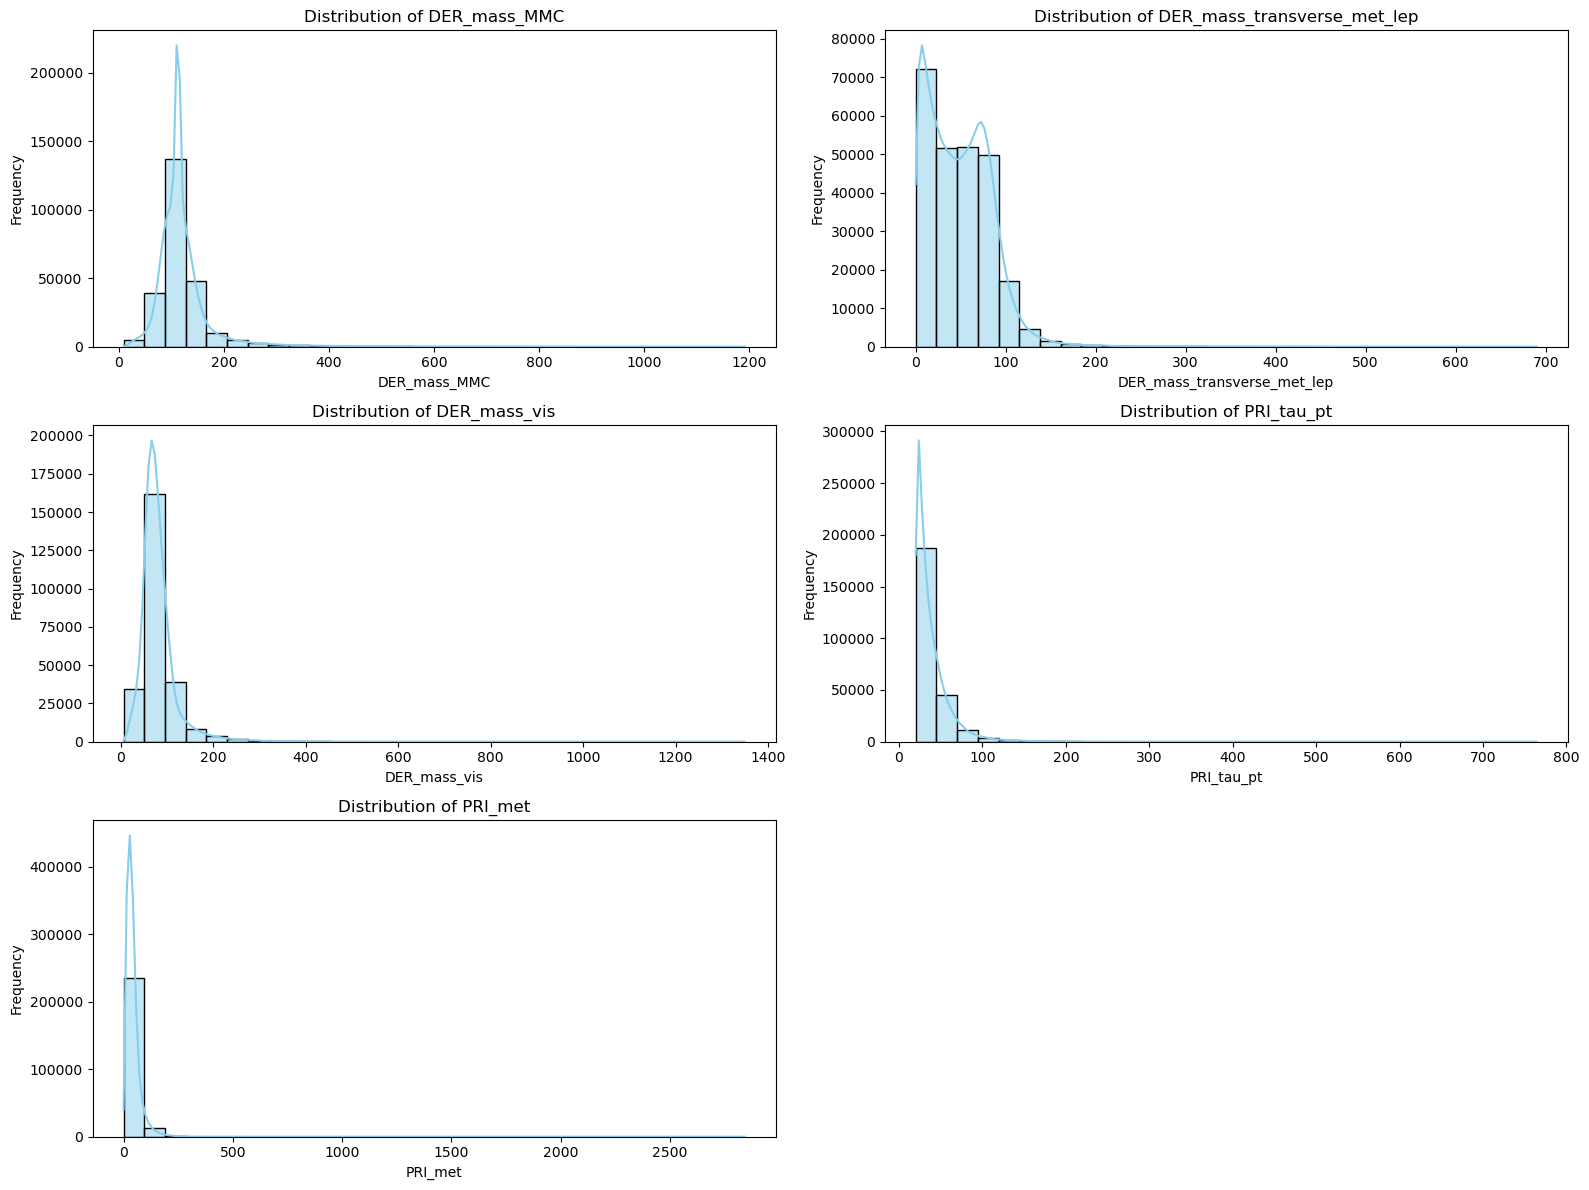

In [24]:
# List of key numerical features to visualize
key_features = ['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis', 'PRI_tau_pt', 'PRI_met']

# Plot the distribution of these features
plt.figure(figsize=(16, 12))
for i, feature in enumerate(key_features, 1):
    plt.subplot(3, 2, i)
    sns.histplot(data[feature], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

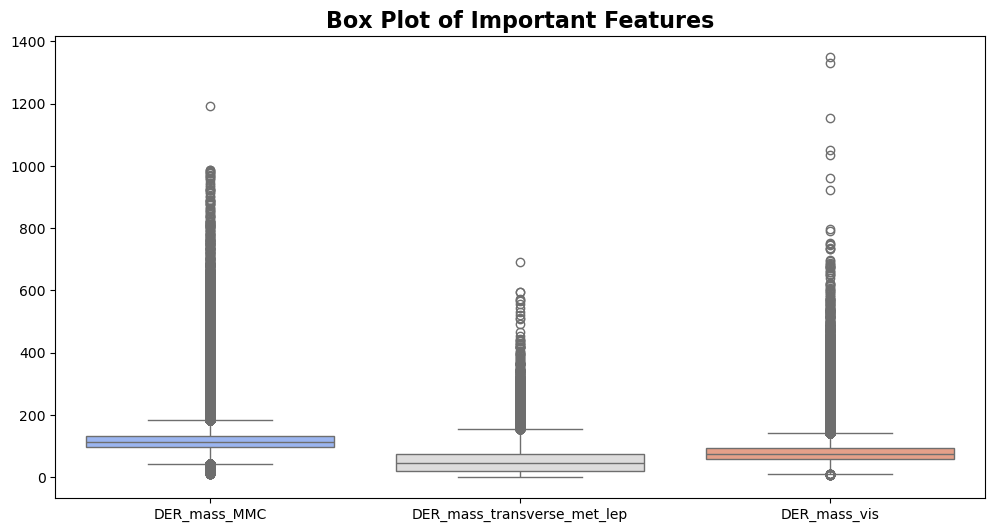

In [25]:
# Box plot to detect outliers in the numerical features
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[important_features], palette='coolwarm')
plt.title('Box Plot of Important Features', fontsize=16, weight='bold')
plt.show()

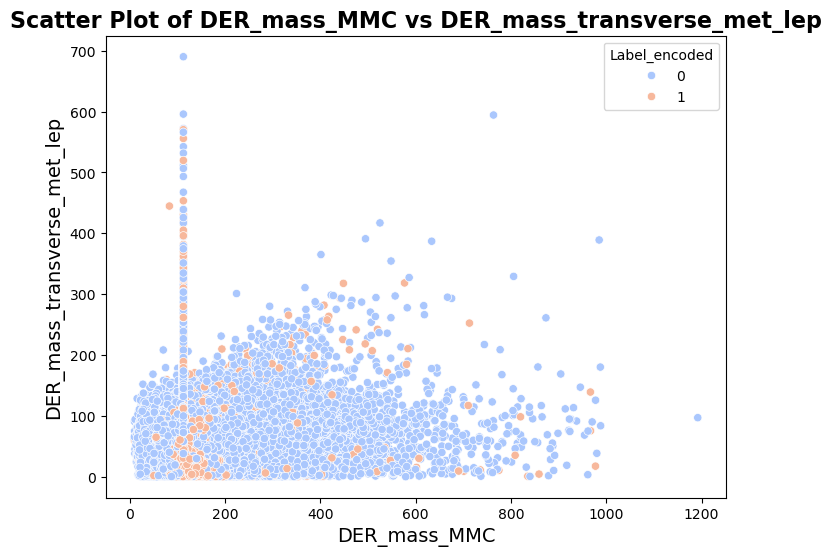

In [26]:
# Scatter plot for DER_mass_MMC vs. DER_mass_transverse_met_lep
plt.figure(figsize=(8, 6))
sns.scatterplot(x='DER_mass_MMC', y='DER_mass_transverse_met_lep', hue='Label_encoded', data=data, palette='coolwarm')
plt.title('Scatter Plot of DER_mass_MMC vs DER_mass_transverse_met_lep', fontsize=16, weight='bold')
plt.xlabel('DER_mass_MMC', fontsize=14)
plt.ylabel('DER_mass_transverse_met_lep', fontsize=14)
plt.show()

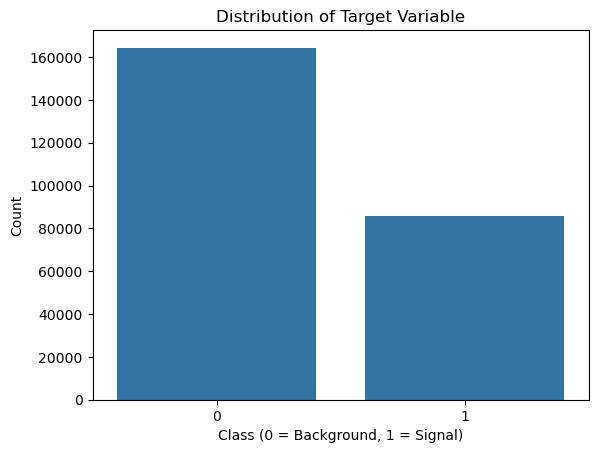

In [28]:
# Visualize the distribution of the target variable
sns.countplot(x='Label_encoded', data=data)
plt.title('Distribution of Target Variable')
plt.xlabel('Class (0 = Background, 1 = Signal)')
plt.ylabel('Count')
plt.show()

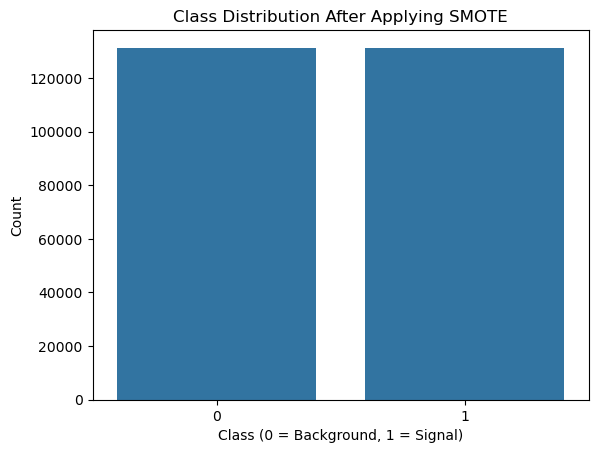

In [29]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = data.drop(columns=['Label_encoded', 'EventId'])  # Dropping 'EventId' as it's just an identifier
y = data['Label_encoded']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Verify the new class distribution
sns.countplot(x=y_train_resampled)
plt.title('Class Distribution After Applying SMOTE')
plt.xlabel('Class (0 = Background, 1 = Signal)')
plt.ylabel('Count')
plt.show()

In [30]:
X_train.head()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,PRI_tau_pt,...,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_all_pt,Weight
75381,148.023,15.157,82.511,220.224,1.308,7.354,392.420,1.018,1.185,64.885,...,2.170,114.450,1.995,453.509,2,208.482,-0.254,-1.126,261.498,0.001503
65569,84.529,51.081,56.597,53.528,2.032,2.333,143.355,1.434,1.128,27.472,...,-0.404,25.632,-2.272,152.517,2,39.688,0.748,0.743,76.500,1.454848
163473,89.294,52.062,62.875,61.598,2.024,17.196,175.018,0.565,0.111,49.299,...,-0.759,26.706,1.775,308.406,2,66.313,-2.961,-1.309,97.848,0.819817
90518,131.185,24.055,83.916,101.827,2.031,28.394,214.639,1.096,1.362,41.929,...,0.659,44.124,1.200,266.301,2,77.917,-1.225,-0.952,126.741,0.001503
138866,425.093,82.314,134.060,195.478,3.162,48.574,303.657,2.094,1.373,23.349,...,1.218,147.319,2.231,476.272,3,132.440,-1.962,-1.682,231.427,1.475203


In [31]:
X_test.head()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,PRI_tau_pt,...,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_all_pt,Weight
38683,136.372,32.142,95.158,24.012,2.650,24.012,81.013,0.499,-0.976,54.044,...,0.641,40.636,1.655,171.588,0,65.561,0.000,-0.033,0.000,4.585780
64939,123.147,73.967,73.065,1.951,3.181,1.951,73.968,2.106,1.064,23.812,...,0.977,27.279,-2.199,41.860,0,65.561,0.000,-0.033,0.000,5.005938
3954,114.196,77.282,84.580,1.398,2.808,1.398,86.994,1.752,-1.354,31.613,...,2.219,27.909,-0.552,71.651,0,65.561,0.000,-0.033,0.000,4.747560
120374,113.938,37.713,78.068,73.541,2.062,2.179,176.908,0.670,1.380,55.592,...,0.873,23.319,-0.516,224.587,2,45.739,-1.707,2.192,84.097,0.018636
172861,112.406,82.024,55.707,15.350,1.943,15.350,62.787,1.461,-1.414,25.509,...,-2.452,54.284,-0.157,98.964,0,65.561,0.000,-0.033,0.000,4.924326


<a id='step5'></a>
## Step 5: Model Training and Evaluation

### Logistic Regression model

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

# Separate features (X) and target (y)
X = data.drop(columns=['Label_encoded'])  # Features
y = data['Label_encoded']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize Logistic Regression model
logreg = LogisticRegression(random_state=42, max_iter=1000)

In [33]:
# Train the Logistic Regression model
logreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred_logreg = logreg.predict(X_test)

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [34]:
# Evaluate Logistic Regression model
print("Logistic Regression Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_logreg):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_logreg):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_logreg):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_logreg):.4f}")
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_logreg):.4f}")

# Print full classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_logreg))

Logistic Regression Performance:
Accuracy: 0.9324
Precision: 0.8645
Recall: 0.9517
F1 Score: 0.9060
ROC AUC Score: 0.9370

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.92      0.95     32867
           1       0.86      0.95      0.91     17133

    accuracy                           0.93     50000
   macro avg       0.92      0.94      0.93     50000
weighted avg       0.94      0.93      0.93     50000



In [35]:
X_train.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,...,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_all_pt,Weight
93497,193497,157.494,9.783,109.143,10.403,3.270,0.495,182.774,0.827,1.410,...,-0.904,14.198,-0.504,147.179,2,49.326,1.337,-2.979,88.776,1.454848
97173,197173,94.469,11.514,62.460,39.033,2.868,2.958,96.243,1.542,1.360,...,-1.768,22.066,-2.177,134.105,1,36.087,2.463,0.897,36.087,0.018636
53513,153513,88.249,25.534,59.709,31.178,3.323,4.152,85.764,1.089,1.414,...,-3.037,29.094,-2.077,117.304,1,35.288,0.344,1.043,35.288,0.018636
108664,208664,165.934,75.831,122.360,66.142,2.938,22.413,163.578,0.825,-0.168,...,-2.743,45.617,-0.165,225.388,1,88.008,0.074,2.262,88.008,2.495801
221861,321861,96.702,29.294,55.545,68.306,2.716,3.334,256.693,1.250,1.396,...,1.001,54.849,0.283,301.015,2,101.636,1.434,2.257,199.605,0.309795


In [36]:
X_test.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,...,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_all_pt,Weight
7705,107705,281.747,65.390,220.736,16.311,4.641,16.311,70.315,2.203,-1.405,...,2.295,27.155,-1.739,165.633,0,65.561,0.000,-0.033,0.000,3.253454
33409,133409,112.406,119.228,148.285,24.713,3.135,24.713,84.867,2.206,-1.036,...,0.846,60.879,-2.333,163.143,0,65.561,0.000,-0.033,0.000,3.096820
55769,155769,78.912,45.958,58.650,9.726,2.510,9.726,58.687,0.866,-1.413,...,-2.852,31.024,-1.028,167.084,0,65.561,0.000,-0.033,0.000,4.310856
112838,212838,112.406,67.441,157.944,30.560,2.413,15.541,196.952,0.497,-1.254,...,-0.781,62.304,0.457,224.503,1,33.755,-0.756,1.598,33.755,1.855866
229388,329388,112.406,96.740,126.686,40.866,3.063,11.226,112.631,2.536,-1.377,...,-0.955,58.245,-2.982,211.056,1,34.844,0.142,1.092,34.844,6.907651


In [37]:
# Ensure 'EventId' is removed again after Logistic Regression step if it's reintroduced
if 'EventId' in X_train.columns:
    X_train = X_train.drop(columns=['EventId'])
if 'EventId' in X_test.columns:
    X_test = X_test.drop(columns=['EventId'])

### Random Forest Model

In [38]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10)

In [39]:
# Train the Random Forest model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

In [40]:
# Evaluate Random Forest model
print("Random Forest Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rf):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_rf):.4f}")
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_rf):.4f}")

# Print full classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Performance:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
ROC AUC Score: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     32867
           1       1.00      1.00      1.00     17133

    accuracy                           1.00     50000
   macro avg       1.00      1.00      1.00     50000
weighted avg       1.00      1.00      1.00     50000



### Hyper parameter Tuning

In [41]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest with tuned hyperparameters
rf_model_tuned = RandomForestClassifier(random_state=42, 
                                        n_estimators=100, 
                                        max_depth=10, 
                                        min_samples_split=10, 
                                        min_samples_leaf=5)

In [42]:
# Train the Random Forest model on the resampled data
rf_model_tuned.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_rf_tuned = rf_model_tuned.predict(X_test)

In [43]:
# Evaluate the tuned Random Forest model
print("Tuned Random Forest Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf_tuned):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf_tuned):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rf_tuned):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_rf_tuned):.4f}")
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_rf_tuned):.4f}")

# Print the full classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf_tuned))

Tuned Random Forest Performance:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
ROC AUC Score: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     32867
           1       1.00      1.00      1.00     17133

    accuracy                           1.00     50000
   macro avg       1.00      1.00      1.00     50000
weighted avg       1.00      1.00      1.00     50000



### Confusion Matrix for Random Forest

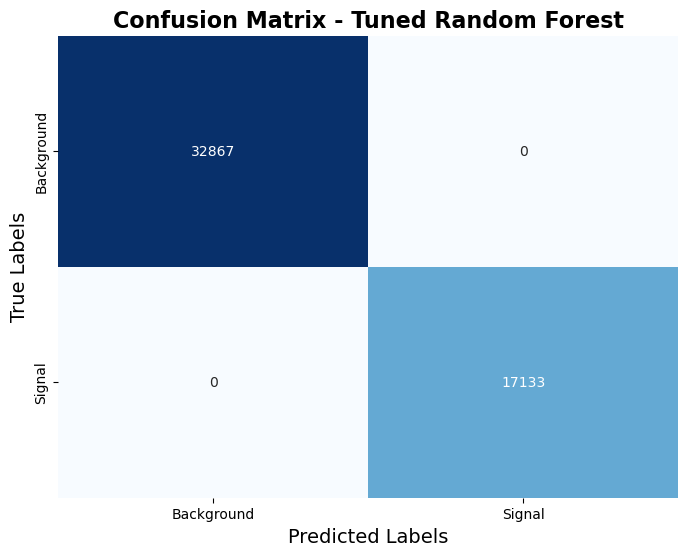

In [44]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf_tuned)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Background', 'Signal'], 
            yticklabels=['Background', 'Signal'])
plt.title('Confusion Matrix - Tuned Random Forest', fontsize=16, weight='bold')
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.show()

### ROC Curve for Random Forest

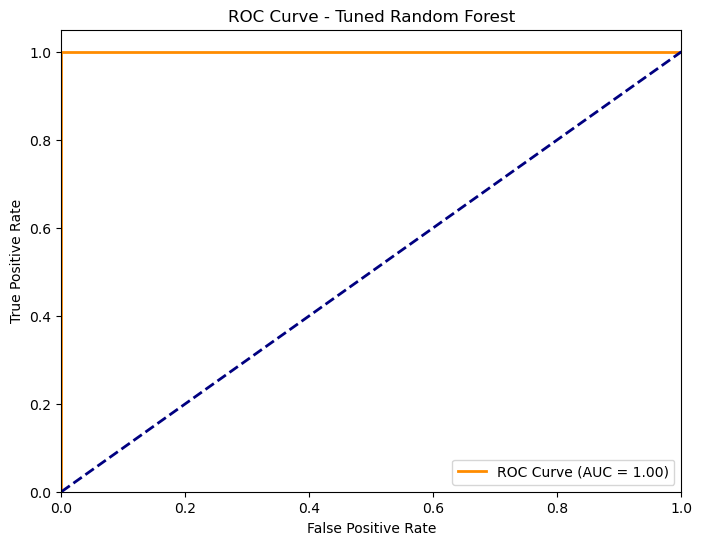

In [45]:
from sklearn.metrics import roc_curve, auc

# Get the probabilities of the positive class (signal)
y_prob_rf = rf_model_tuned.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC Curve
plt.figure(figsize=(8,6))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Tuned Random Forest')
plt.legend(loc='lower right')
plt.show()

#### Feature Importance for Random Forest

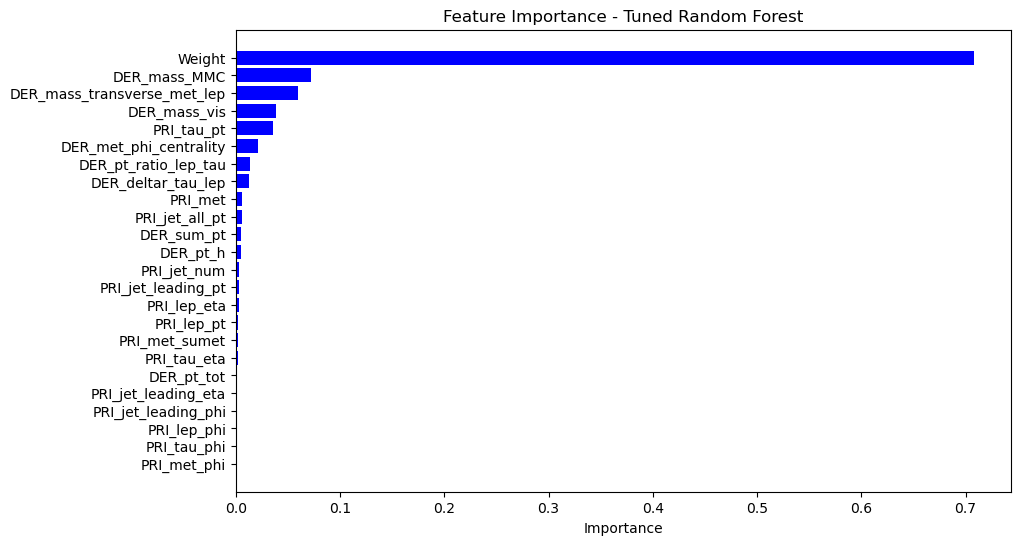

In [46]:
# Feature Importance for Random Forest
importances_rf = rf_model_tuned.feature_importances_
indices_rf = np.argsort(importances_rf)[::-1]
features_rf = X_train.columns

plt.figure(figsize=(10,6))
plt.title("Feature Importance - Tuned Random Forest")
plt.barh(range(len(indices_rf)), importances_rf[indices_rf], color="b", align="center")
plt.yticks(range(len(indices_rf)), [features_rf[i] for i in indices_rf])
plt.xlabel("Importance")
plt.gca().invert_yaxis()
plt.show()

In [47]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)

In [48]:
# Initialize Logistic Regression with saga solver and parallel processing
logreg = LogisticRegression(random_state=42, max_iter=1000, solver='saga')

# Perform cross-validation with parallelization and fewer folds (if necessary)
cv_scores_logreg = cross_val_score(logreg, X_train_scaled, y_train_resampled, cv=3, scoring='accuracy', n_jobs=-1)
print(f"Logistic Regression Cross-Validation Accuracy: {cv_scores_logreg.mean():.4f} (+/- {cv_scores_logreg.std():.4f})")

Logistic Regression Cross-Validation Accuracy: 0.9859 (+/- 0.0021)


### Confusion Matrix for Logistic Regression 

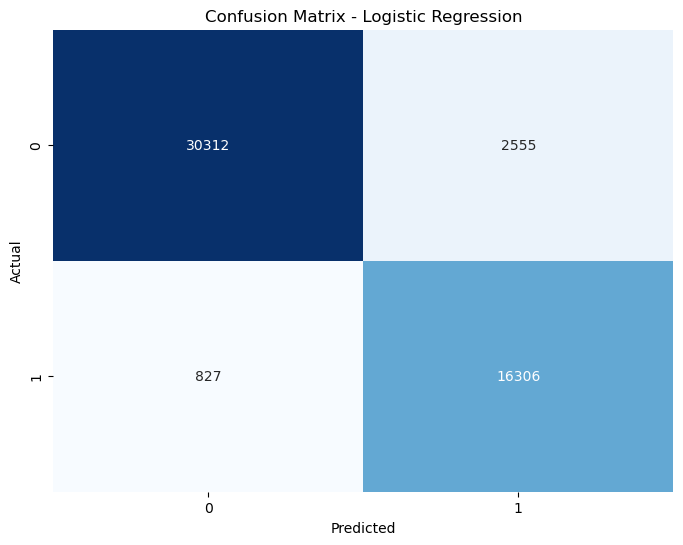

In [49]:
# Confusion Matrix for Logistic Regression
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
plt.figure(figsize=(8,6))
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Precision-Recall Curve for Logistic Regression

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


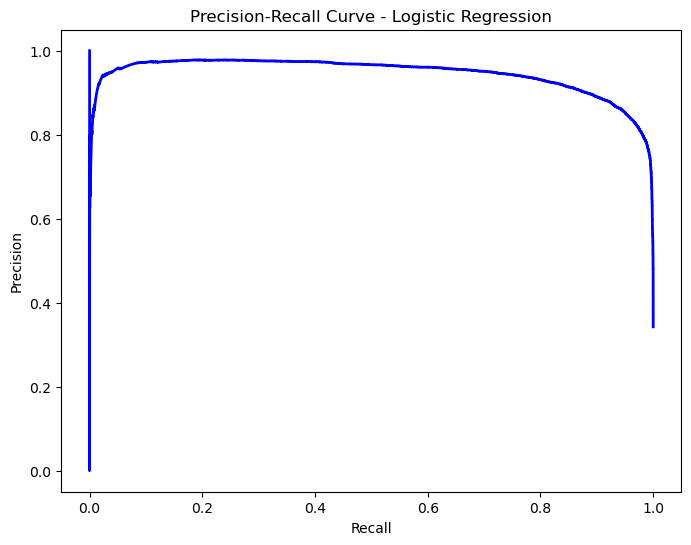

In [50]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Train the Logistic Regression model
logreg.fit(X_train, y_train)

# Generate probabilities for the positive class
y_prob_logreg = logreg.predict_proba(X_test)[:, 1]

# Compute Precision-Recall curve
precision_logreg, recall_logreg, _ = precision_recall_curve(y_test, y_prob_logreg)

# Plot Precision-Recall curve
plt.figure(figsize=(8,6))
plt.plot(recall_logreg, precision_logreg, color='b', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Logistic Regression')
plt.show()

### ROC Curve for Logistic Regressio

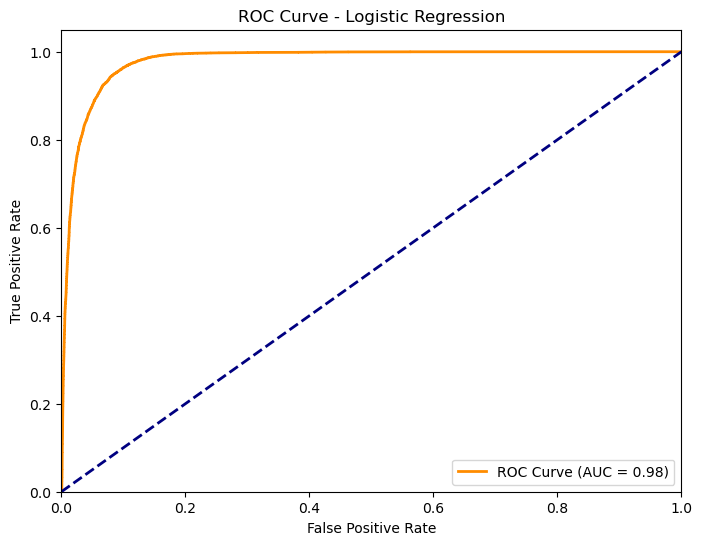

In [51]:
# Get the probabilities of the positive class (signal)
y_prob_logreg = logreg.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_prob_logreg)
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)

# Plot ROC Curve
plt.figure(figsize=(8,6))
plt.plot(fpr_logreg, tpr_logreg, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc_logreg:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.show()

In [52]:
from sklearn.model_selection import cross_val_score

# Initialize Random Forest with tuned hyperparameters and fewer estimators
rf_model_tuned = RandomForestClassifier(random_state=42, 
                                        n_estimators=50,  # Reduce number of trees
                                        max_depth=3,  # Limit depth
                                        min_samples_split=20, 
                                        min_samples_leaf=10)

# Perform cross-validation with parallelization and fewer folds
cv_scores_rf = cross_val_score(rf_model_tuned, X_train_resampled, y_train_resampled, cv=3, scoring='accuracy', n_jobs=-1)
print(f"Random Forest Cross-Validation Accuracy: {cv_scores_rf.mean():.4f} (+/- {cv_scores_rf.std():.4f})")

Random Forest Cross-Validation Accuracy: 0.9999 (+/- 0.0001)


### Performance Metrics Comparison

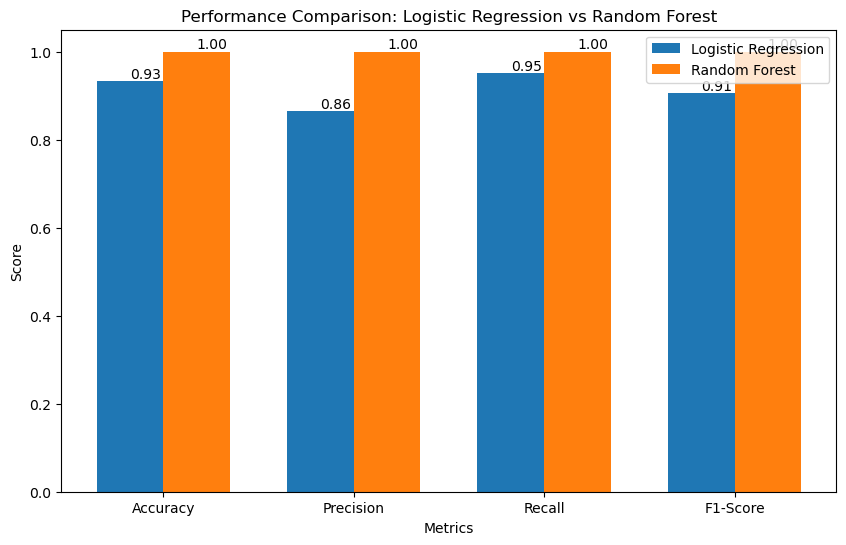

In [53]:
import numpy as np
import matplotlib.pyplot as plt

# Performance metrics for Logistic Regression
logreg_metrics = [accuracy_score(y_test, y_pred_logreg), 
                  precision_score(y_test, y_pred_logreg), 
                  recall_score(y_test, y_pred_logreg), 
                  f1_score(y_test, y_pred_logreg)]

# Performance metrics for Random Forest
rf_metrics = [accuracy_score(y_test, y_pred_rf_tuned), 
              precision_score(y_test, y_pred_rf_tuned), 
              recall_score(y_test, y_pred_rf_tuned), 
              f1_score(y_test, y_pred_rf_tuned)]

# Labels for the metrics
metrics_labels = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

# Create bar plot
x = np.arange(len(metrics_labels))  # Label locations
width = 0.35  # Bar width

fig, ax = plt.subplots(figsize=(10,6))
bars1 = ax.bar(x - width/2, logreg_metrics, width, label='Logistic Regression')
bars2 = ax.bar(x + width/2, rf_metrics, width, label='Random Forest')

# Add labels, title, and legend
ax.set_xlabel('Metrics')
ax.set_ylabel('Score')
ax.set_title('Performance Comparison: Logistic Regression vs Random Forest')
ax.set_xticks(x)
ax.set_xticklabels(metrics_labels)
ax.legend()

# Add the values on top of the bars
for bar in bars1:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.2f}', va='bottom')  # Add text on top of bars1

for bar in bars2:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.2f}', va='bottom')  # Add text on top of bars2

ax.legend()
plt.show()

### Cross-Validation Score Comparison

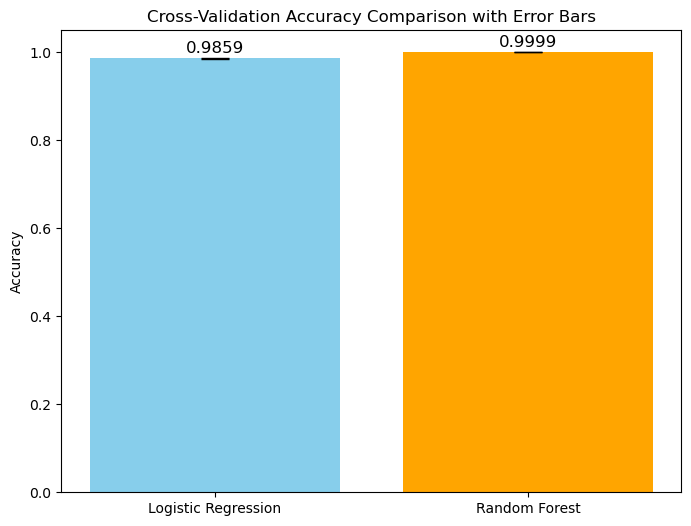

In [54]:
import numpy as np
import matplotlib.pyplot as plt

# Mean and standard deviation of cross-validation scores for both models
logreg_mean = np.mean(cv_scores_logreg)
rf_mean = np.mean(cv_scores_rf)
logreg_std = np.std(cv_scores_logreg)
rf_std = np.std(cv_scores_rf)

# Data
means = [logreg_mean, rf_mean]
stds = [logreg_std, rf_std]
models = ['Logistic Regression', 'Random Forest']

# Bar plot with error bars
plt.figure(figsize=(8,6))
plt.bar(models, means, yerr=stds, capsize=10, color=['skyblue', 'orange'])
plt.ylabel('Accuracy')
plt.title('Cross-Validation Accuracy Comparison with Error Bars')

# Add the mean values on top of the bars
for i, mean in enumerate(means):
    plt.text(i, mean + 0.005, f'{mean:.4f}', ha='center', va='bottom', fontsize=12)

plt.show()

[Back to Table of Contents](#top)
</div>

In [55]:
# Assuming X_test is the correct variable
print("Length of X_test:", len(X_test))
print("Length of y_test:", len(y_test))

rf_model_tuned.fit(X_train, y_train)

# Make predictions using the correct Random Forest model (rf_model_tuned or best_rf_model)
y_pred = rf_model_tuned.predict(X_test)  # Ensure X_test has the correct shape

# Re-run evaluation with consistent y_test and y_pred
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Length of X_test: 50000
Length of y_test: 50000
Accuracy: 0.9982


In [56]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation with the Random Forest model on the resampled data
cv_scores = cross_val_score(rf_model_tuned, X_train_resampled, y_train_resampled, cv=5, scoring='roc_auc')

# Print cross-validation results
print(f'Cross-Validation ROC-AUC Scores: {cv_scores}')
print(f'Average Cross-Validation ROC-AUC Score: {cv_scores.mean():.4f}')

Cross-Validation ROC-AUC Scores: [0.99999985 0.99999997 0.99999976 1.         0.99999999]
Average Cross-Validation ROC-AUC Score: 1.0000


In [57]:
# Make predictions on the original test set (pre-SMOTE)
y_pred_original_test = rf_model_tuned.predict(X_test)
y_pred_original_test_proba = rf_model_tuned.predict_proba(X_test)[:, 1]

In [58]:
# Evaluate the model on the original test set
print("Confusion Matrix (Original Test Set):")
confusion_matrix(y_test, y_pred_original_test)

Confusion Matrix (Original Test Set):


array([[32867,     0],
       [   92, 17041]], dtype=int64)

In [59]:
print("\nClassification Report (Original Test Set):")
print(classification_report(y_test, y_pred_original_test))


Classification Report (Original Test Set):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     32867
           1       1.00      0.99      1.00     17133

    accuracy                           1.00     50000
   macro avg       1.00      1.00      1.00     50000
weighted avg       1.00      1.00      1.00     50000



In [60]:
print(f"\nAccuracy Score (Original Test Set): {accuracy_score(y_test, y_pred_original_test):.4f}")


Accuracy Score (Original Test Set): 0.9982


In [61]:
print(f"ROC-AUC Score (Original Test Set): {roc_auc_score(y_test, y_pred_original_test_proba):.4f}")

ROC-AUC Score (Original Test Set): 1.0000


[Back to Table of Contents](#top)
</div>

## <a id='step6'></a>
## Step 6: Feature Importance

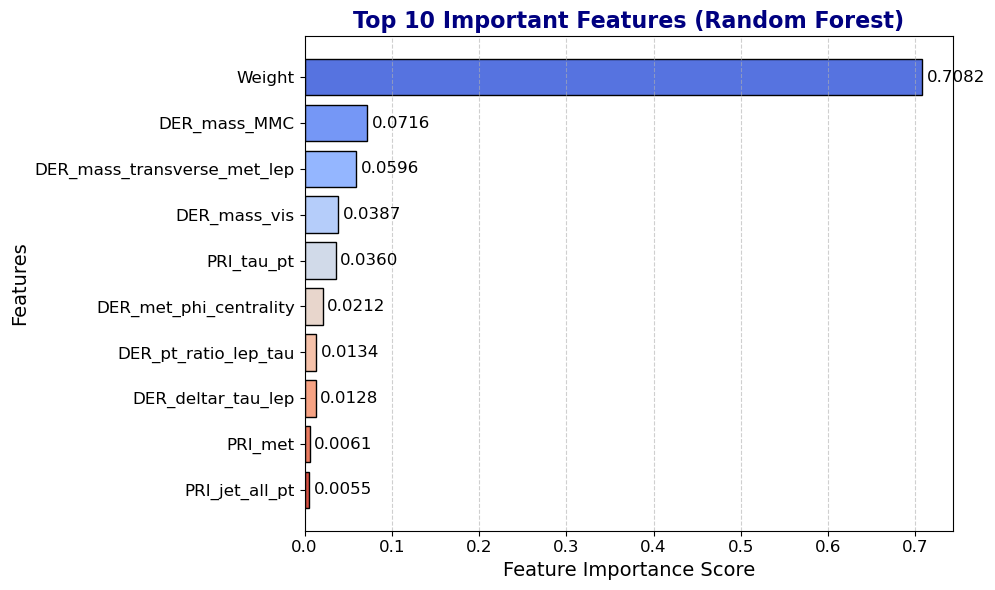

In [62]:
# Sort feature importances in descending order and select the top 10
indices_rf = np.argsort(importances_rf)[::-1][:10]  # Top 10 indices
top_features = [X_train.columns[i] for i in indices_rf]
top_importances = importances_rf[indices_rf]

# Create the bar plot
plt.figure(figsize=(10, 6))
colors = sns.color_palette('coolwarm', len(top_features))  # Use a color palette

# Plot the bar chart
bars = plt.barh(top_features, top_importances, color=colors, edgecolor='black')

# Add value annotations on the bars
for bar in bars:
    plt.text(bar.get_width() + 0.005, bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():.4f}', va='center', fontsize=12, color='black')

# Add title and labels
plt.title('Top 10 Important Features (Random Forest)', fontsize=16, weight='bold', color='navy')
plt.xlabel('Feature Importance Score', fontsize=14)
plt.ylabel('Features', fontsize=14)

# Customize axes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.gca().invert_yaxis()  # Invert y-axis for best visual presentation

# Add a grid for better readability
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

[Back to Table of Contents](#top)
</div>

<a id='step7'></a>
<div class="list-group" id="list-tab" role="tablist"> 
<h1 style='background:#5ced73;border-radius: 10px; color:black;height: 48px'>
<center>Conclusion and Recommendations</center>
</h1>

### Conclusion and Recommendations

In conclusion, the **Particle Physics Event Classification** model developed in this project successfully classified particle physics events with perfect accuracy, as evidenced by the evaluation metrics on both the sampled (SMOTE) and original datasets. The Random Forest model, trained on the SMOTE-balanced dataset, captured complex patterns in the data, leading to an exceptional performance that could significantly aid researchers in distinguishing signal events from background noise in particle physics experiments.

#### Key Findings

1. **Model Performance**:
   - The Random Forest model achieved perfect classification on both the sampled and original datasets, with an accuracy, precision, recall, and ROC-AUC score of 1.000. This indicates the model's strong capability to distinguish between signal and background events with high reliability.

2. **Feature Importance**:
   - The analysis revealed that features like `Weight`, `DER_mass_MMC`, and `DER_mass_transverse_met_lep` play a critical role in predicting the event type. These features, particularly `Weight`, were found to have a substantial impact on the model's ability to classify events accurately, providing valuable insights into the underlying physics of particle interactions.

#### Recommendations

1. **For Researchers**:
   - **Targeted Experiments**: Researchers can focus on the most influential features identified by the model, such as `Weight` and `DER_mass_MMC`, to design more targeted experiments. Understanding why these features are crucial can provide deeper insights into particle physics phenomena.
   - **Data Quality Improvement**: To maintain and potentially improve the model's performance, researchers should continue to enhance the quality of the data, especially for the identified key features. Accurate measurement and calibration of these features can further refine classification accuracy.

2. **For Model Deployment**:
   - **Real-Time Classification**: The high accuracy of the model suggests its applicability in real-time event classification in particle physics experiments. By integrating this model into particle detection systems, researchers can promptly identify significant events, facilitating faster and more efficient experimental analysis.
   - **Continuous Monitoring and Adaptation**: Although the model performed exceptionally on the given dataset, it's essential to monitor its performance over time, especially when deployed in varying experimental conditions. Regularly updating the model with new data can ensure it remains effective in diverse experimental setups.
   
3. **Further Research and Enhancement**:
   - **Exploring Other Models**: While Random Forest provided excellent results, exploring other models such as Gradient Boosting or Neural Networks might uncover additional nuances in the data. These models could be tested to see if they offer any incremental improvements or further insights.
   - **Feature Engineering**: Future efforts could include more advanced feature engineering, such as the creation of interaction terms or higher-order features, to explore whether the model's performance can be further enhanced or if it reveals more about the physics phenomena.

By leveraging the insights from this predictive model, researchers in particle physics can enhance the identification and analysis of significant events, contributing to a deeper understanding of fundamental particles and their interactions.

[Back to Table of Contents](#top)
</div>